In [4]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


from sklearn.linear_model import (LogisticRegression, LinearRegression,PassiveAggressiveClassifier, Ridge, Lasso, ElasticNet)
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import warnings

In [5]:
warnings.filterwarnings('ignore')

In [7]:
df_X = pd.read_csv("train_X.csv")
df_y = pd.read_csv("train_y.csv")
df_test_X = pd.read_csv("test_X.csv")

ids = df_test_X['Unnamed: 0']


In [8]:
df_X

,CunstructedAASeq_cln,Id
0,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,11328
1,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,5781
2,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,13681
3,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,30804
4,SKGEELFTGVVPILVELDGDVNGHTFSVSGEGEGDATYGELTLKFI...,30813
...,...,...
33024,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,7024
33025,SKGEELFTGVVPTLVELDGDVNGHKFSVSGEGAGDATYSKLTLKFI...,14012
33026,SKGEELFTGVVPVLVELDGDVNGHKFSVSGEGEGDATYGKLTLKLI...,4140
33027,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,15193


In [3]:
ids

0      1576BB97-F8EA-48FF-9494-EBC7A0C97312
1      63F4281A-4D90-4589-879E-549097FB3459
2      74CF740D-201D-4070-99B9-F007E7C4D472
3      1329E1C1-743E-4541-9081-165572D4BF47
4      88BBA1BF-44E0-416E-A028-04F410A3FE5D
                       ...                 
105    638A0BBA-E2BE-449C-8BF5-EC07F765200C
106    FD3BD018-3B83-4689-BC70-CE6E98F83790
107    739BEBEA-F6CC-4827-81D4-28102A8B774B
108    5F86DB7A-1906-4E2F-BD50-0AEE3C80B17D
109    536FEED2-6251-41BC-AA61-EA46744EAB05
Name: Unnamed: 0, Length: 110, dtype: object

### Testing & Training Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=0)
X_train.set_index('Unnamed: 0', inplace=True)
y_train.set_index('Unnamed: 0', inplace=True)
X_test.set_index('Unnamed: 0', inplace=True)
y_test.set_index('Unnamed: 0', inplace=True)
df_test_X.set_index('Unnamed: 0', inplace=True)

### Initial Classification Testing without reducing features - LogisticRegression, LinearRegression, PassiveAggressiveClassifier, Ridge

In [15]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  

y_pred = pipe.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy1)
print("F1 score:", f1)

Accuracy: 0.8648648648648649
F1 score: 0.8656183428507498


In [330]:
df_log_regression = pd.DataFrame({'ID':ids})


df1 = pd.DataFrame({'xml_neoplasm_histologic_grade':y_pred})
df_log_regression = pd.concat([df_log_regression, df1], axis=1)

df_log_regression
df_log_regression.to_csv('hv_bin_class.csv', index=False)

In [10]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(C=200,penalty='l1', solver='liblinear', tol=0.01))
pipe.fit(X_train, y_train)  
y_pred = pipe.predict(X_test)
pipe.score(X_test, y_pred)


accuracy1 = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")


print("Accuracy:", accuracy1)
print("F1 score:", f1)

0.8288288288288288 0.8291786038912474


In [13]:
pipe3 = make_pipeline(StandardScaler(),PassiveAggressiveClassifier(C=0.00001,max_iter=800, random_state=25,tol=0.001) )
pipe3.fit(X_train, y_train) 
y_pred = pipe3.predict(X_test)


accuracy1 = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy1)
print("F1 score:", f1)

0.8558558558558559 0.8568750568750568


In [12]:
pipe3 = make_pipeline(StandardScaler(),PassiveAggressiveClassifier(max_iter=200, random_state=30, tol=1e-20) )
pipe3.fit(X_train, y_train)
y_pred = pipe3.predict(df_test_X)

df_ridge_regression = pd.DataFrame({'ID':ids})

df2 = pd.DataFrame({'xml_neoplasm_histologic_grade':y_pred})
df_ridge_regression = pd.concat([df_ridge_regression, df2], axis=1)

df_ridge_regression
df_ridge_regression.to_csv('hv_bin_class2.csv', index=False)


In [72]:
pipe4 = make_pipeline(StandardScaler(), LinearRegression() )
pipe4.fit(X_train, y_train) 
y_pred = pipe4.predict(X_test)


for i in range(len(y_pred)):
    for j in range(len(y_pred[i])):
        y_pred[i][j] = int(round(y_pred[i][j]))
        

accuracy1 = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")


print("Accuracy:", accuracy1)
print("F1 score:", f1)

0.8648648648648649 0.8656183428507498


In [5]:
pipe4 = make_pipeline(StandardScaler(), LinearRegression() )
pipe4.fit(X_train, y_train) 

y_pred = pipe4.predict(df_test_X)


new_y_pred = []

for i in range(len(y_pred)):
    for j in range(len(y_pred[i])):
        y_pred[i][j] = int(round(y_pred[i][j]))
        new_y_pred.append( int(round(y_pred[i][j])) )
        
df_ridge_regression = pd.DataFrame({'ID':ids})

df2 = pd.DataFrame({'xml_neoplasm_histologic_grade':new_y_pred})
df_ridge_regression = pd.concat([df_ridge_regression, df2], axis=1)

df_ridge_regression
df_ridge_regression.to_csv('hv_bin_class3.csv', index=False)

In [8]:
pipe5 = make_pipeline(StandardScaler(), Ridge(alpha=1e-30) )
pipe5.fit(X_train, y_train) 
y_pred = pipe5.predict(X_test)

for i in range(len(y_pred)):
    for j in range(len(y_pred[i])):
        y_pred[i][j] = int(round(y_pred[i][j]))
        
accuracy1 = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy1)
print("F1 score:", f1)

0.8648648648648649 0.8656183428507498


### GridSearchCV

#### GridSearch was used to approximate best alpha and max iteration value to be used in LASSO.

In [18]:
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000],
    'max_iter': [0,100,200,300,400,500,1000, 2000]}


grid_search = GridSearchCV(estimator = Lasso(), param_grid = param_grid , cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_max_iter = grid_search.best_params_['max_iter']

/Users/heathst/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 0.0065537593984962405
  model = cd_fast.enet_coordinate_descent(
/Users/heathst/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 0.006499624060150378
  model = cd_fast.enet_coordinate_descent(
/Users/heathst/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 0.0065537593984962405
  model = cd_fast.enet_coordinate_descent(
/Users/heathst/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate

KeyError: 'l1_ratio'

In [39]:
print('alpha:',best_alpha)
print('iterations:', best_max_iter)

NameError: name 'best_alpha' is not defined

### Performed LASSO 

#### Lasso was done to find features with high coefficient values. Features which had 0 coefficient value were removed to reduce the amount of irrelevant factors contributing to model classification and prediction.

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.02,max_iter=200 )

lasso_model.fit(X_train, y_train) 

selected_features = [feature for feature, coef in zip(X_train.columns, lasso_model.coef_) if coef != 0]

# Use the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[X_train_selected.columns]
df_test_X_selected = df_test_X[X_train_selected.columns]

In [18]:
len(selected_features)

265

#### Originally the dataset contained 17970 features and after performing Lasso the dataset contains 265 features. The reduced features were used in classification models to see if there was any improvement of classification accuracy.

In [75]:
pipe4 = make_pipeline(StandardScaler(), LogisticRegression(C=10,penalty='elasticnet',solver='saga',l1_ratio=0.5) )
pipe4.fit(X_train_selected, y_train) 

y_pred = pipe4.predict(X_test_selected)

df_ridge_regression = pd.DataFrame({'ID':ids})

df2 = pd.DataFrame({'xml_neoplasm_histologic_grade':y_pred})
df_ridge_regression = pd.concat([df_ridge_regression, df2], axis=1)

accuracy1 = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy1)
print("F1 score:", f1)

0.8198198198198198 0.8198198198198198


/Users/heathst/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/heathst/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [67]:
pipe4 = make_pipeline(StandardScaler(), LogisticRegression(C=10,penalty='elasticnet',solver='saga',l1_ratio=0.5) )
pipe4.fit(X_train_selected, y_train) 

y_pred = pipe4.predict(df_test_X_selected)

df_ridge_regression = pd.DataFrame({'ID':ids})


df2 = pd.DataFrame({'xml_neoplasm_histologic_grade':y_pred})
df_ridge_regression = pd.concat([df_ridge_regression, df2], axis=1)


df_ridge_regression
df_ridge_regression.to_csv('hv_bin_class8.csv', index=False)

/Users/heathst/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/heathst/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [76]:
pipe4 = make_pipeline(LinearRegression() )
pipe4.fit(X_train_selected, y_train) 
y_pred = pipe4.predict(X_test_selected)


for i in range(len(y_pred)):
    for j in range(len(y_pred[i])):
        y_pred[i][j] = int(round(y_pred[i][j]))

accuracy1 = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")


print("Accuracy:", accuracy1)
print("F1 score:", f1)

0.8018018018018018 0.8036909819518516


In [89]:
pipe4 = make_pipeline( LinearRegression() )
pipe4.fit(X_train_selected, y_train) 
y_pred = pipe4.predict(df_test_X_selected)

new_y_pred = []

for i in range(len(y_pred)):
    for j in range(len(y_pred[i])):
        y_pred[i][j] = int(round(y_pred[i][j]))
        
        if y_pred[i][j] < 1.5:
            new_y_pred.append( round(abs(y_pred[i][j]))) 
        elif y_pred[i][j] > 1.5:
            new_y_pred.append(1)

df_ridge_regression = pd.DataFrame({'ID':ids})

df2 = pd.DataFrame({'xml_neoplasm_histologic_grade':new_y_pred})
df_ridge_regression = pd.concat([df_ridge_regression, df2], axis=1)


df_ridge_regression
df_ridge_regression.to_csv('hv_bin_class10.csv', index=False)

In [19]:
pipe = make_pipeline(LogisticRegression())
pipe.fit(X_train_selected, y_train)  
y_pred = pipe.predict(X_test_selected)


accuracy1 = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy1)
print("F1 score:", f1)

Accuracy: 0.8198198198198198
F1 score: 0.8198198198198198


### Y-Randomization

#### Y-Randomization involves scarmbling labels for a random guessing process. The scrambled labels are then fitted against the model and predictions are made to visualize accuracy when compared to higher accuracy yielding models such as LinearRegression and LogisticRegression.

In [116]:
shuffle = []

for i in range(100): 
    y_random = np.random.permutation(y_train) 
      
    model = LinearRegression() 
    model.fit(X_train, y_random) 
      
    y_pred = model.predict(X_test)
    
    for i in range(len(y_pred)):
        for j in range(len(y_pred[i])):
            y_pred[i][j] = int(round(y_pred[i][j]))
        
    shuffle.append( accuracy_score(y_test, y_pred) )


In [115]:
shuffle[:10]

[0.5135135135135135,
 0.5765765765765766,
 0.3783783783783784,
 0.5495495495495496,
 0.4774774774774775,
 0.5405405405405406,
 0.5405405405405406,
 0.42342342342342343,
 0.5945945945945946,
 0.4864864864864865]

#### The Y-Randomization process results in a lower classification accuracy than the best models which were Linear and Logistic Regression

### Which genes are the most important for model decision?

#### Genes which do not have a 0 coefficient are the most important for model decision. These genes were found by running LASSO and defining selected features as those having 0 coefficient. The top 20 genes are listed below:

In [117]:
selected_features[:20]

['ENSG00000006059',
 'ENSG00000007350',
 'ENSG00000008196',
 'ENSG00000021461',
 'ENSG00000037965',
 'ENSG00000041515',
 'ENSG00000044012',
 'ENSG00000046774',
 'ENSG00000062096',
 'ENSG00000064218',
 'ENSG00000067048',
 'ENSG00000069482',
 'ENSG00000071677',
 'ENSG00000073754',
 'ENSG00000075891',
 'ENSG00000078579',
 'ENSG00000081800',
 'ENSG00000091583',
 'ENSG00000100170',
 'ENSG00000100362']

### Visualize the group / Separate two groups of patients

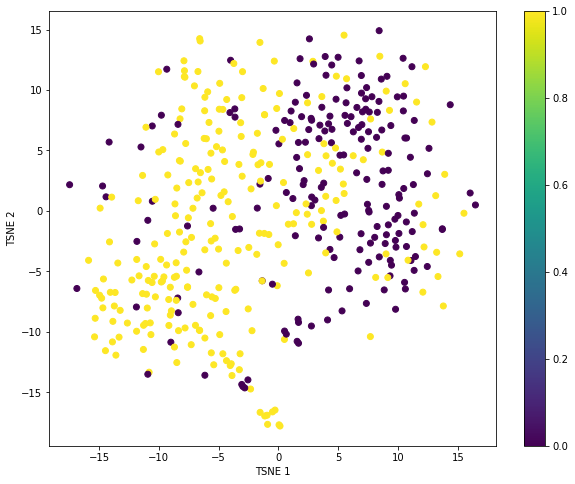

In [9]:
tsne = TSNE(2)
reduced = tsne.fit_transform(df_X)

f, ax = plt.subplots(figsize=(10,8))
scatter2 = plt.scatter(x=reduced.T[0], y=reduced.T[1],c= df_y['xml_neoplasm_histologic_grade'])
f.colorbar(scatter2)


plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.show()

#### The scatterplot above shows the separated groups of patients after performing TSNE on the original X_train data before the splitting into training and test set were performed.

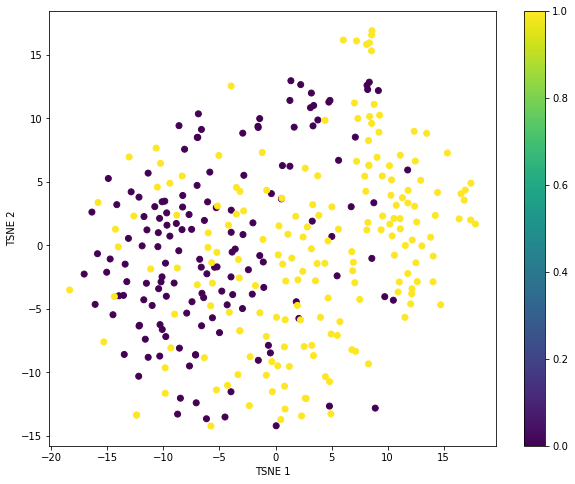

In [5]:
tsne = TSNE(2)
reduced = tsne.fit_transform(X_train)

f, ax = plt.subplots(figsize=(10,8))
scatter2 = plt.scatter(x=reduced.T[0], y=reduced.T[1],c= y_train['xml_neoplasm_histologic_grade'])
f.colorbar(scatter2)

plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.show()

#### The scatterplot above shows the separated groups of patients after performing TSNE on the original X_train data without any removed features

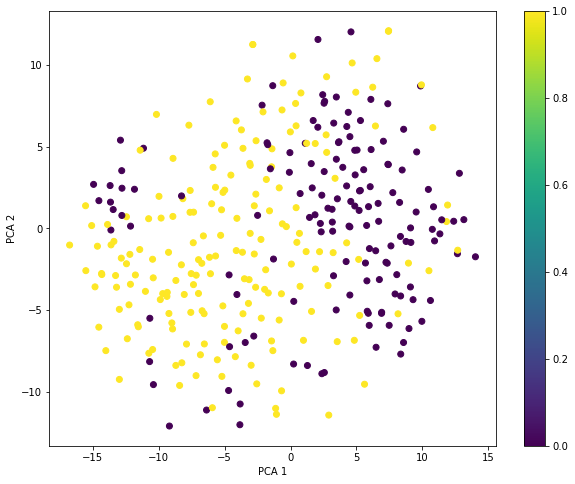

In [132]:
tsne = TSNE(2)
reduced = tsne.fit_transform(X_train_selected)

f, ax = plt.subplots(figsize=(10,8))
scatter2 = plt.scatter(x=reduced.T[0], y=reduced.T[1],c= y_train['xml_neoplasm_histologic_grade'])
f.colorbar(scatter2)
#plt.xlim(-10,75)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.show()

#### The scatterplot above shows the separated groups of patients after performing TSNE on the feature reduced  X_train data.